image filters and kernels. 

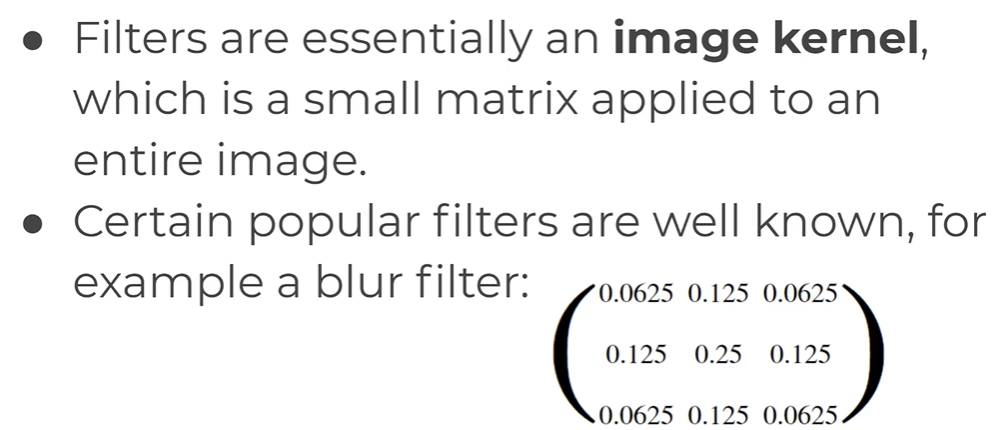



stride = 1: Cach 1 pixcel filter 1 lan

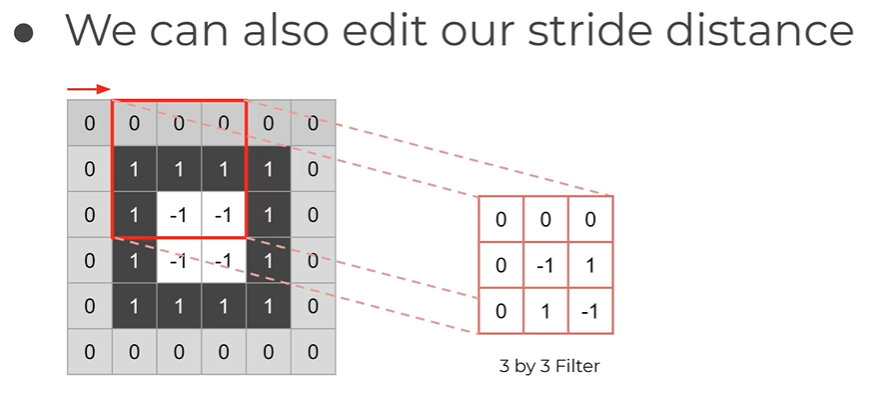

Stride = 2: Cachs 2 pixcel filter 1 lan

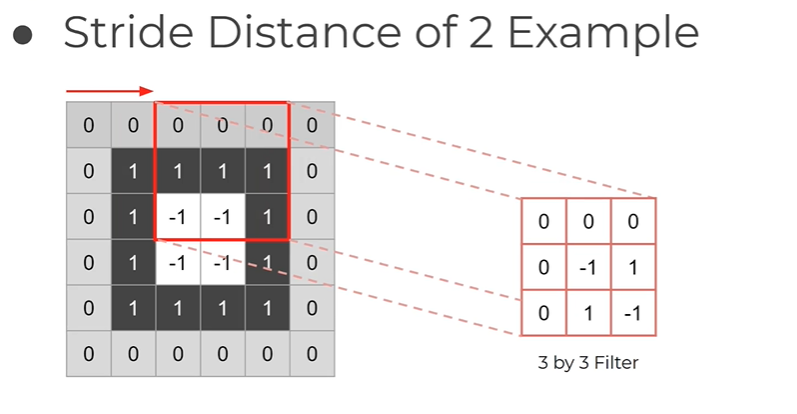

Kernels: blur kernals, botteom sober (to detect eadge), .....
Filters: convolution kernels. 



https://setosa.io/ev/image-kernels/

 filters --> convolution kernels.
the process passing filters over an image is know as convolution.

Padding: Add in value as 0 or 1 at eadge of image to avoide loss infomation at border. 



after padding: 

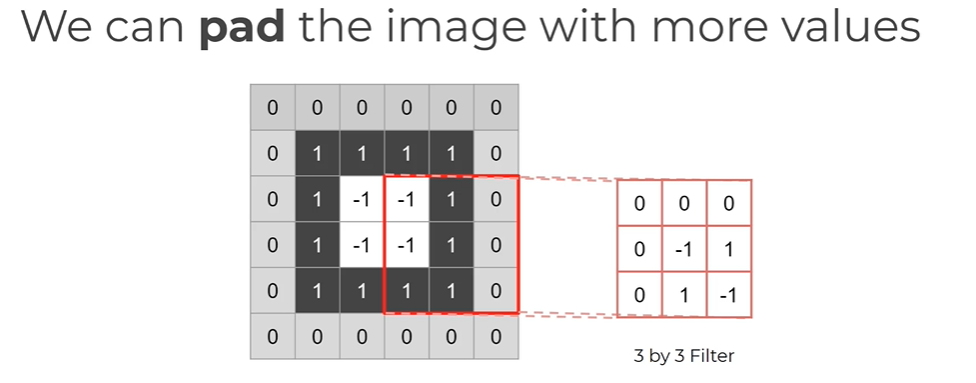

# convolution layers

### 1 Diemntion: 

ANN: require huge amount of calculation, parameters as fully connected.  



CNN: tried to localized neurals to each local layers. 

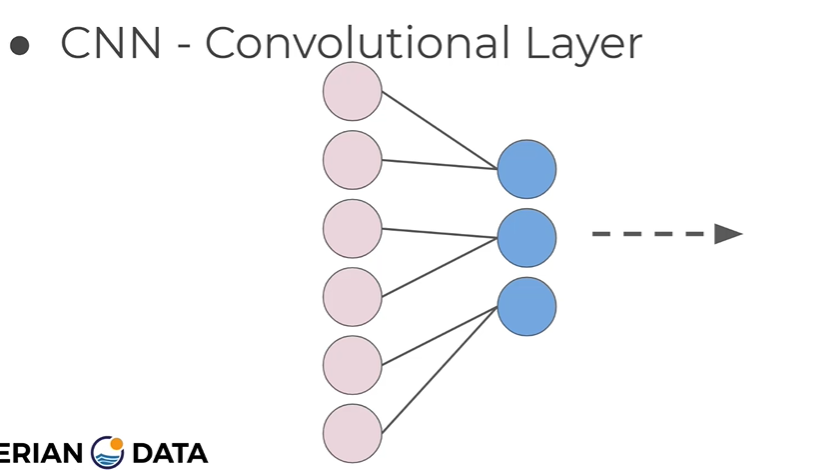

Here we have only 1 filter: 



Here we have 2 filters: blur filter or eadge detection filter.....





### 2D

1st Filters: 



\

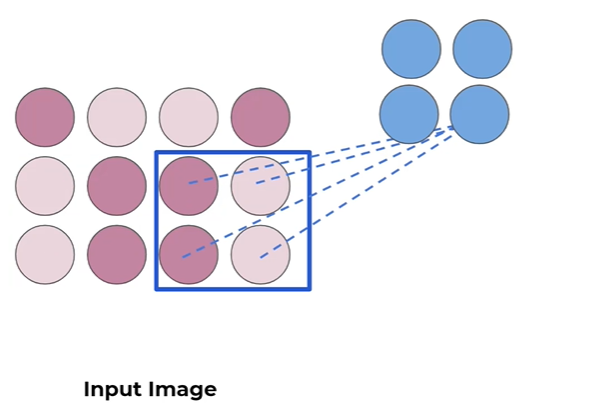

2nd filters: 

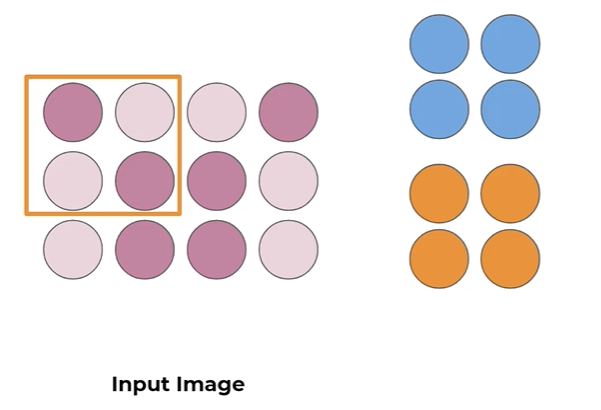

3rd filter: 

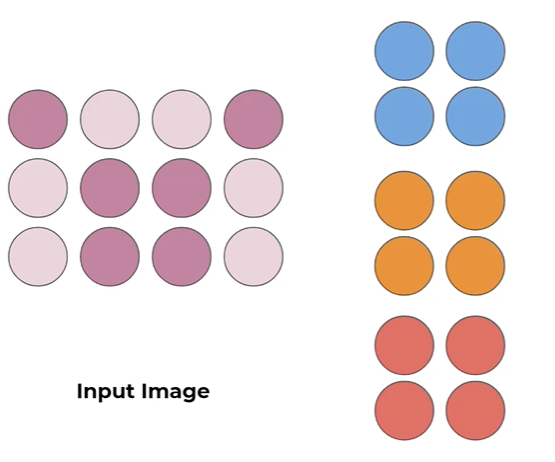

Stack all filters output, we have convolution layers: 

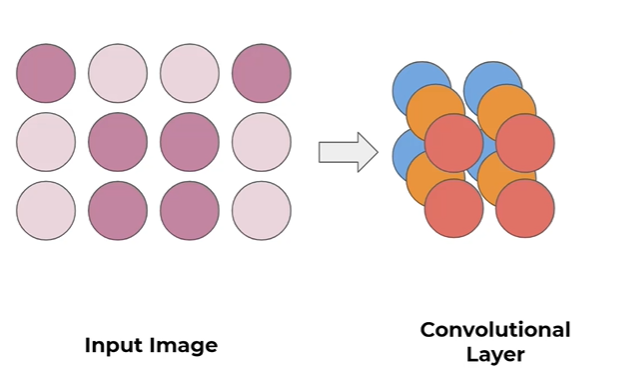

### 3 D

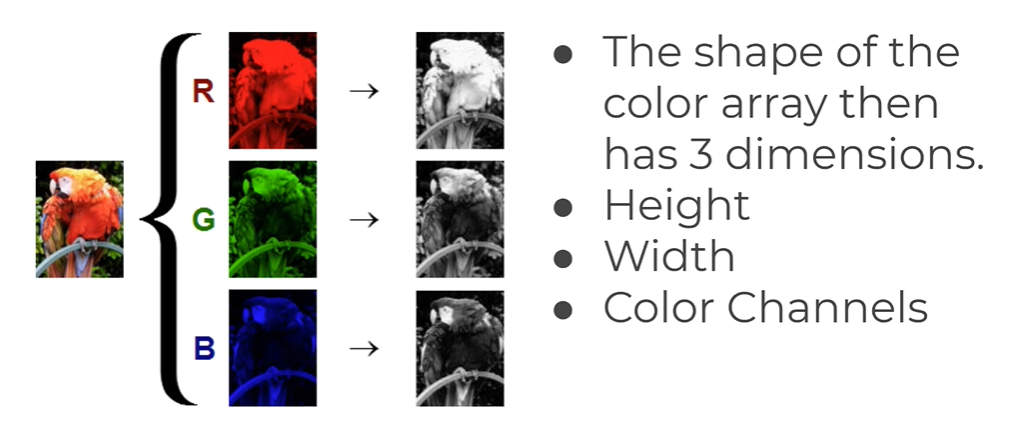

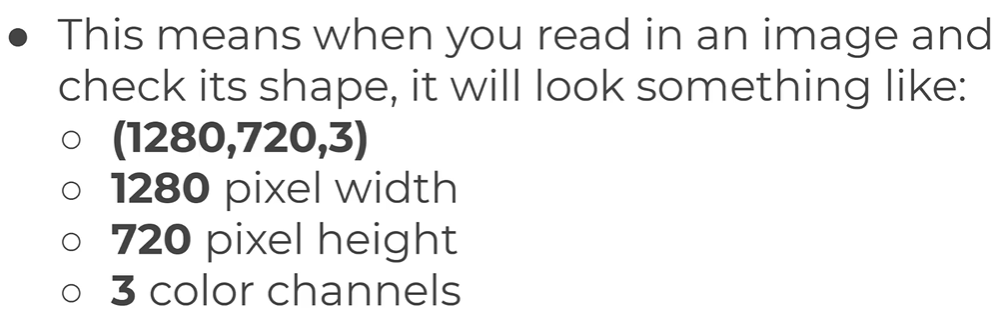

add in filters for each dimension color (R, G, B)
For each filters: add in intensity of colow: 

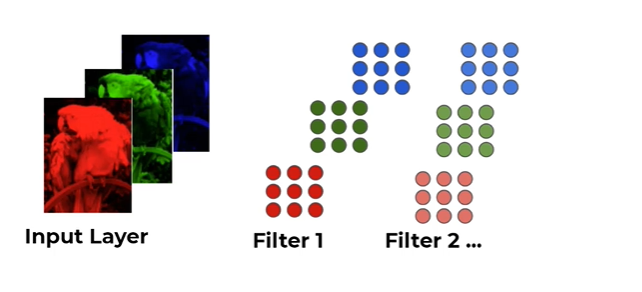

## pooling layers

to reduce huge amount of parameters cause from a lot of filters using.

Method: traspose convolution layers and pooling to smaller dimension by below method or Dropout method

Happend after convolution layers

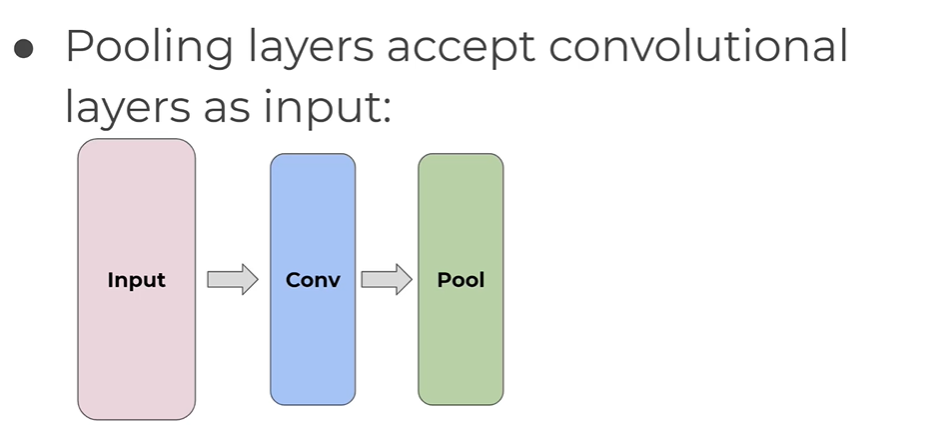

Ther are multipole layers: 

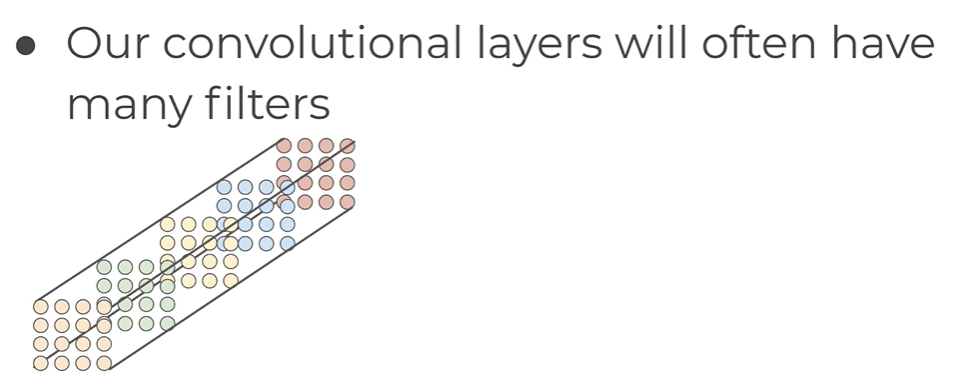

Pooling on signle layer:

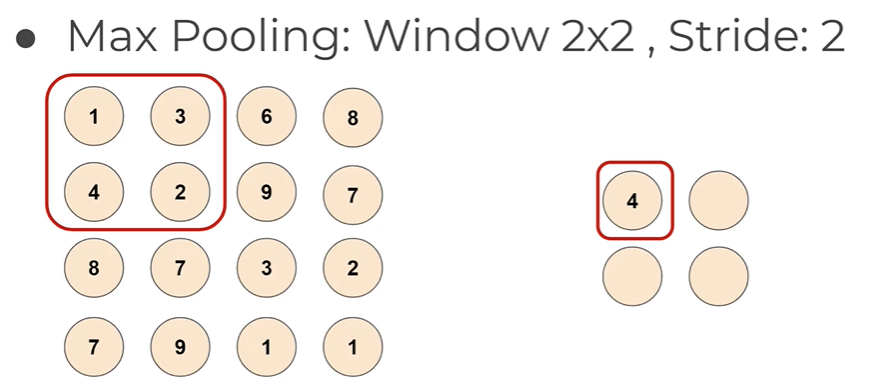

method:
Max pooling layer:

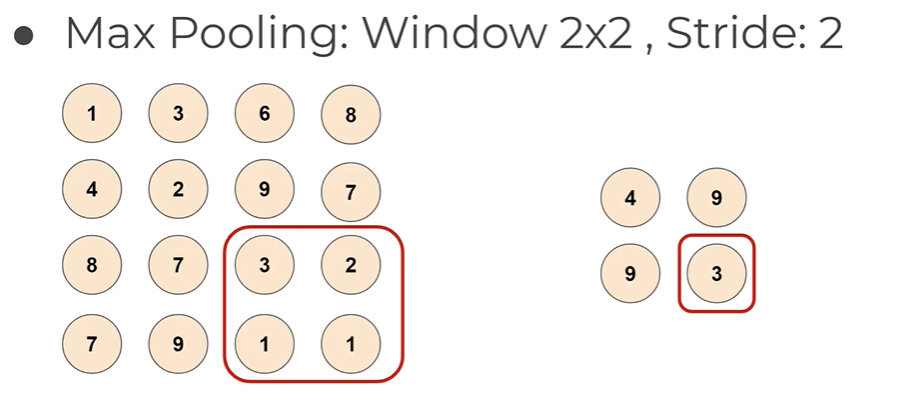

average pooling

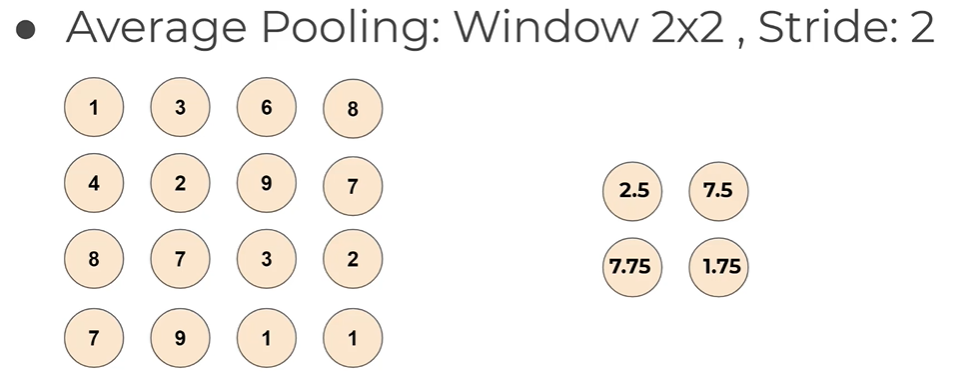

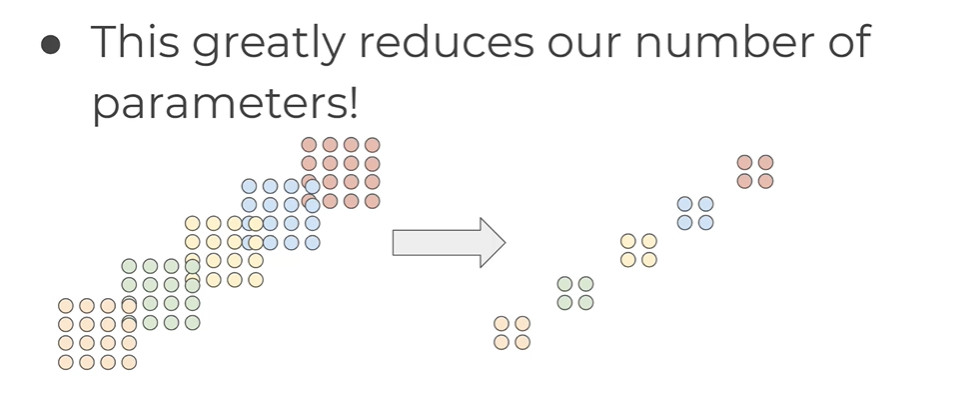

Some famous CNN architect:

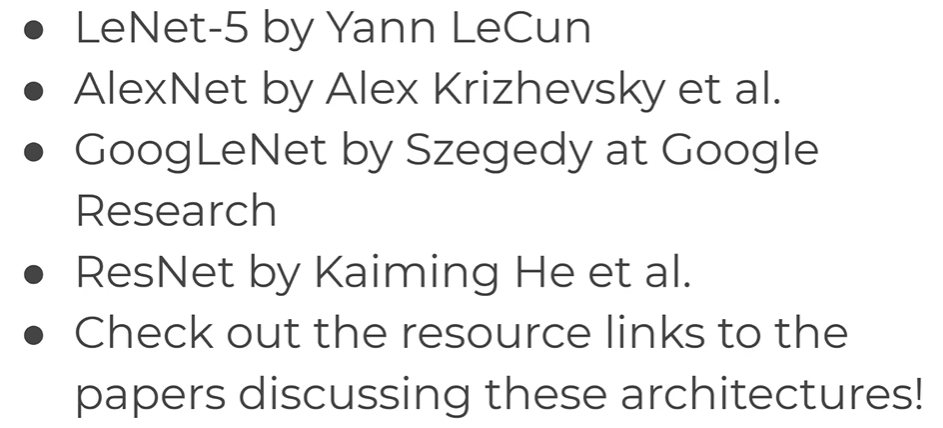





CN- Pooling arctecture:

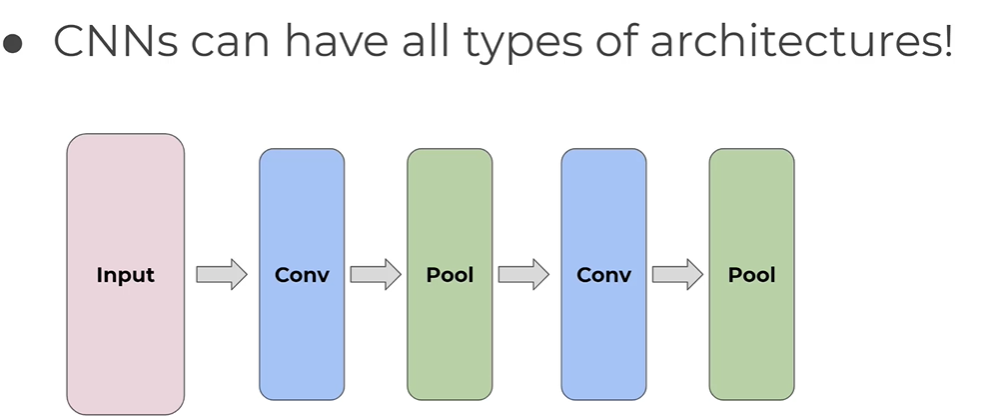

after CN- Pooling architecuitre, need to add fully connected layer (FC)

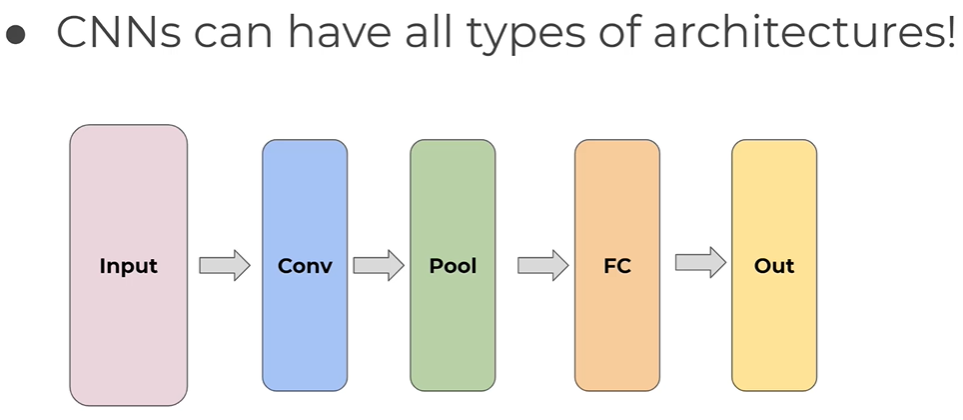

# apply to MNIST data set

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 14s 1us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image = X_train[0]
single_image.shape

(28, 28)

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

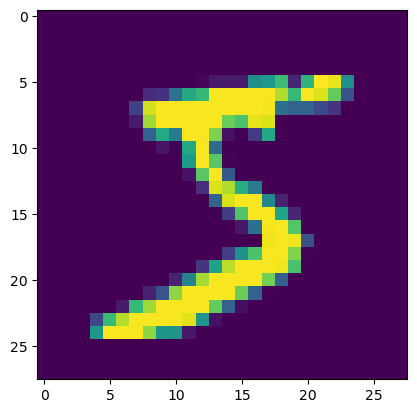

In [7]:
plt.imshow(single_image)

In [ ]:
## we can change to other color on  matplotlib: https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
### we need to make sure system understand that
##y_train data are categorical with classification task rather than numeric for regression.
### --> multi classification --> require onehot encoded.

In [9]:
from tensorflow.keras.utils import to_categorical
y_train.shape

(60000,)

In [10]:
y_example = to_categorical(y_train)

In [11]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
y_example[0] ## --> the first number is 5 --> after onehot enconder: value will be 1 at 5th position.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes = 10)

In [14]:
single_image.max(), single_image.min()

(255, 0)

In [15]:
### we can import MinMaxscaler to transofrm train and test data.
### we also can devide each data by 255 (as image only have max = 255 and min = 0)
x_train = X_train/255
x_test = X_test/255
sacled_image = x_train[0]

In [16]:
sacled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

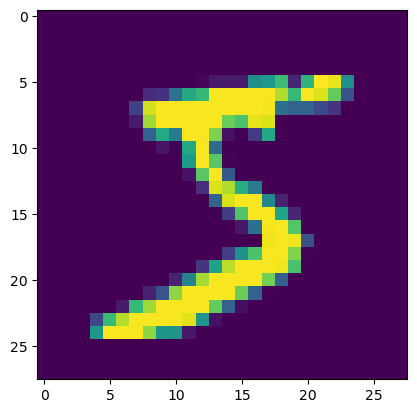

In [17]:
plt.imshow(sacled_image)

In [18]:
x_train.shape

(60000, 28, 28)

In [ ]:
## we need to add in 1 layer for system to understand we are working on single RGB channel

In [19]:
## batch_size, witdth, height, color channel
x_train = x_train.reshape(60000, 28, 28, 1)

In [20]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size =(4,4) , input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2) ))

In [23]:
28*28

784

In [24]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu', ))
## output layers --> softmax for multi class
model.add(Dense(10, activation = 'softmax'))

In [ ]:
### keras.io/metrics

In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience= 1)

In [ ]:
model.fit(x_train, y_cat_train, epochs = 10, validation_data= (x_test, y_cat_test), callbacks= early_stop)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1382 - accuracy: 0.9589 - val_loss: 0.0458 - val_accuracy: 0.9847
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0448 - val_accuracy: 0.9865
Epoch 3/10
1651/1875 [=========================>....] - ETA: 3s - loss: 0.0301 - accuracy: 0.9908

In [ ]:
## Model evaluation